# Deconvolution d'une image
Le principe du TP est de deconvoluer une image pour rendre visible la plaque d'immatriculation d'une automobile.

## Code

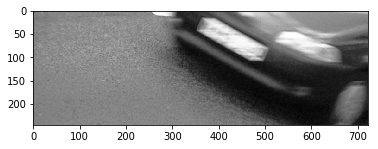

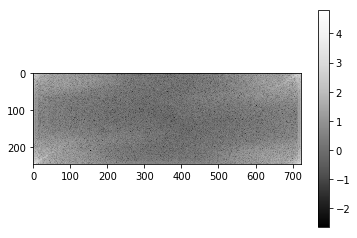

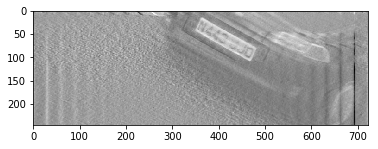

In [1]:
from __future__ import division
import numpy as np
import scipy
from numpy import *
from scipy import *
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

%matplotlib inline


I = imread("car.png")[:,:,1] # The image is already in black & white, so we can just read one color channel (here red)
# I is a N1 x N2 array such that I[i,j], between 0 and 1, codes the intensity of light at pixel (i,j).
# Careful: i is the vertical index and j is the horizontal one! (check it)
figure()
imshow(I, cmap="Greys_r") # Greys_r to display 0 as black and 1 and white

# useful functions: fft2 (not fft!), ifft2 (not ifft!), conj
figure()
imshow(log10(abs(fft2(I))), cmap="Greys_r") # Greys_r to display 0 as black and 1 and white
colorbar()


L = 15
mu = 0.005 # without this term, the noises will be emphasized by the fourier transformation
height, width = I.shape
h = np.zeros((height, width))


for j in range(0, 2*L):
    h[0, j]=1./(2*L)


g_hat = fft2(I)
h_hat = fft2(h)

square_h_hat = h_hat*h_hat

f_hat = g_hat*np.conjugate(h_hat)/(abs(square_h_hat)+mu)

figure()
imshow(np.real(ifft2(f_hat)), cmap="Greys_r")
show()


## Coefficient L
Nous avons obtenu le coefficient L en mesurant l'étalement d'un des coins de la plaque d'immatriculation. En effet, ce qui devrait être un point sur la voiture s'étale sur 30 pixels sur l'image de la voiture. Ainsi, $L = 15$ semble tout indiqué car chaque pixel est une moyenne des 15 pixels sur la gauche et des 15 pixels sur la droite :
$g[i,j] = \frac{1}{30}\Sigma_{n=-15}^{15} f[i+n,j]$

## Noyau de convolution du flou

On cherche une matrice $h$ telle que $g = f*h$ et $g[i, j] = \sum\limits_{n=-L}^{L}\frac{f(i+n, j)}{2L}$.

Le candidat $h = \begin{bmatrix} 
\frac{1}{2L} & ... & \frac{1}{2L} & 0 & ... & 0 \\
0 & &... & & & 0 \\
...& &... & & & ... \\
0 & &... & & & 0 \\
\end{bmatrix}
$ est tout indiqué.

Vérifions le :

\begin{equation}
\begin{split}
g[i, j]  & = \sum\limits_{n,m=0}^{N-1}\sum\limits_{k=-L}^{L}\frac{f[i+k, j]}{2L}h[i-n, j-m] \\
 & = \frac{1}{2L} \sum\limits_{n=0}^{N-1}\sum\limits_{k=-L}^{L}f[i+k, j]h[i-n, 0]\\
 & = \frac{1}{2L} \sum\limits_{k=-L}^{L}\sum\limits_{n=N-2L}^{N}\frac{f[i+k, j]}{2L}\\
 & = \frac{1}{2L} \sum\limits_{k=-L}^{L}f[i+k, j]
\end{split}
\end{equation}

## Coefficient $\mu$


Le coefficient $\mu$ permet de ne pas rendre la déconvolution sensible au bruit (le dénominateur est très proche de zéro de la calcul de $\hat{f}$). Nous avons obtenu de bon résultat avec $\mu = 0.005$ qui est suffisamment petit pour ne pas fausser la déconvolution mais suffisamment grand pour ne pas rendre l'algortihme sensible au bruit.

## Nature du filtre créé
Le filtre que nous créons est un passe-haut car en floutant on ne sélectionne que les basses fréquences. L'opération inverse correspond donc à un passe-haut, car on va sélectionné les hautes fréquences (les gradients élevés dans l'image).